A **class** combines (and abstracts) data and functions - house blueprints
An **object** is an instantiation of a class - house itself 

String is a built in class, append is a function
Int is a built in class, '+' is a function

We can define our own classes.

myBall = Ball(10.0, 15.0, 0.0, -5.0)
constructor:
    - allocate memory for a Ball object
    - initializes the Ball object with values
    - returns address of the Ball object
    - *** similar to a list

In [28]:
import drawsvg as draw
from random import randint, random

D = draw.Drawing(200, 200, origin='center') # define drawing canvas
EARTH_GRAVITY_ACCELERATION = 9.8   # acceleration due to gravity, m/sec^2
BALL_RADIUS = 10  # radius of the ball in pixels

# Ball class
class Ball:
    # __init__ syntax -> class constructor
    # self is the address of the object created with the class
    def __init__(self, start_x, start_y, start_v_x, start_v_y, color='blue'): # default color is blue
        # Ball location and velocity
        self.x = start_x # reach into object using self variable
        self.y = start_y
        self.v_x = start_v_x
        self.v_y = start_v_y

        # Ball color, for drawing purposes
        self.color = color
    
    # RETURN location of object when print(object) is called
    def __str__(self):
        return str(self.x) + ", " + str(self.y)

    # this function only takes in one param, but it also refers to 'self'
    def update_position(self, timestep):
        # update x and y positions  based on x and y velocities multiplied by timestep
        self.x = self.x + timestep * self.v_x
        self.y = self.y + timestep * self.v_y

    def update_velocity(self, timestep):
        self.v_y = self.v_y + timestep * EARTH_GRAVITY_ACCELERATION

    def animate_step(self, timestep):
        self.update_position(timestep)
        self.update_velocity(timestep)

    def draw_ball(self):
        D.append(draw.Circle(self.x, self.y, BALL_RADIUS, fill=self.color))

# Create myBall object using the Ball class
myBall = Ball(10.0, 15.0, 0.0, -5.0)

# update myBall's position
myBall.update_position(0.1) #update_position(myball, 0.1)

# What happens when you print an object?
b = Ball(10, 15, 0, -5)
print(b)

10, 15


the x-coordinate is  5.0
the y-coordinate is  5.0
the x-coordinate is  5.3
the y-coordinate is  5.6
the y-velocity is  6.98


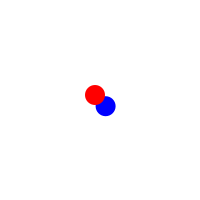

In [7]:
# test Ball class
ball1 = Ball(5.0, 5.0, 3.0, 6.0)
print( "the x-coordinate is ", ball1.x)
print( "the y-coordinate is ", ball1.y)

ball1.update_position(0.1)
print( "the x-coordinate is ", ball1.x)
print( "the y-coordinate is ", ball1.y)

ball1.animate_step(0.1)
print( "the y-velocity is ", ball1.v_y)

ball1.draw_ball()

ball2 = Ball(-5.0, -5.0, -3.0, -6.0, "red")
ball2.draw_ball()
D


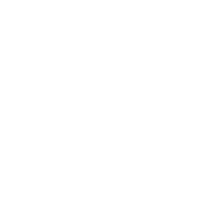

KeyboardInterrupt: 

In [29]:
# Ball object animation

ball1 = Ball(5.0, 5.0, 10.0, 20.0, "green")
ball2 = Ball(-5.0, -5.0, -10.0, 20.0, "red")

def draw_frame():
    ball1.draw_ball()
    ball2.draw_ball()
    return D

for i in range(0,100):
    D = draw.Drawing(200, 200, origin='center') # erase canvas
    
    with draw.frame_animate_jupyter(draw_frame, delay=0.05) as anim:
        anim.draw_frame()
        
    ball1.animate_step(0.1)
    ball2.animate_step(0.1)

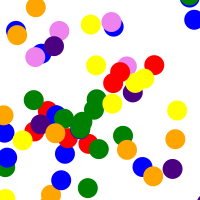

KeyboardInterrupt: 

In [30]:
# Creating a list of objects.
ball_list = []
colors = ['red', 'orange', 'yellow','green', 'blue', 'indigo', 'violet']
for i in range(1,100):
    x  = randint(-90,90)
    y  = randint(-90,90)
    vx = 20*random() - 10
    vy = 20*random() - 10
    c  = randint(0,len(colors)-1)
    ball_list.append( Ball( x, y, vx, vy, colors[c] ) )

def draw_frame():
    for b in ball_list:
        b.draw_ball()
    for b in ball_list:
        b.update_position(0.1) # no gravity
    return D    

for i in range(0,1000):
    D = draw.Drawing(200, 200, origin='center') # erase canvas
    with draw.frame_animate_jupyter(draw_frame, delay=0.05) as anim:
        anim.draw_frame()

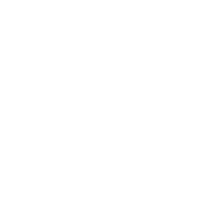

KeyboardInterrupt: 

In [31]:
# List of Ball objects (with gravity)
def draw_frame():
    for b in ball_list:
        b.draw_ball()
    for b in ball_list:
        #b.update_position(0.2) # no gravity
        b.animate_step(0.2) # with gravity

    return D    

ball_list = []; # initialize empty list
colors = ['red', 'orange', 'yellow','green', 'blue', 'indigo', 'violet']
for i in range(1,100):
    x  = randint(-90,90)
    y  = randint(-90,90)
    vx = 20*random() - 10
    vy = 20*random() - 10
    c  = randint(0,len(colors)-1)
    ball_list.append( Ball(x, y, vx, vy, colors[c]) )

for i in range(0,1000):
    D = draw.Drawing(200, 200, origin='center' ) # erase canvas
    with draw.frame_animate_jupyter(draw_frame, delay=0.05) as anim:
        anim.draw_frame()
